In [1]:
from datascience import *
%matplotlib inline
from path_data_variable import *
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [2]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian/PI', 'Black/AA', 'Caucasian', 'Hispanic', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.54, 0.12, 0.01),
    'Panels', make_array(0.26, 0.08, 0.54, 0.08, 0.04)
)

jury

Ethnicity | Eligible | Panels
Asian/PI  | 0.15     | 0.26
Black/AA  | 0.18     | 0.08
Caucasian | 0.54     | 0.54
Hispanic  | 0.12     | 0.08
Other     | 0.01     | 0.04

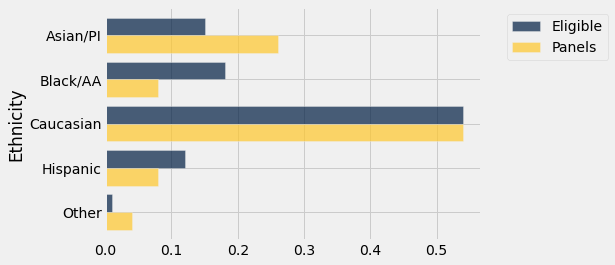

In [3]:
jury.barh('Ethnicity')

In [4]:
eligible_population = jury.column('Eligible')
sample_distribution = sample_proportions(1453, eligible_population)
panels_and_sample = jury.with_column('Random Sample', sample_distribution)
panels_and_sample

Ethnicity | Eligible | Panels | Random Sample
Asian/PI  | 0.15     | 0.26   | 0.14384
Black/AA  | 0.18     | 0.08   | 0.163799
Caucasian | 0.54     | 0.54   | 0.538197
Hispanic  | 0.12     | 0.08   | 0.143152
Other     | 0.01     | 0.04   | 0.0110117

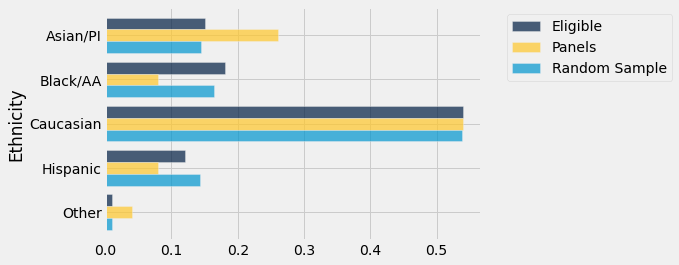

In [5]:
panels_and_sample.barh('Ethnicity')

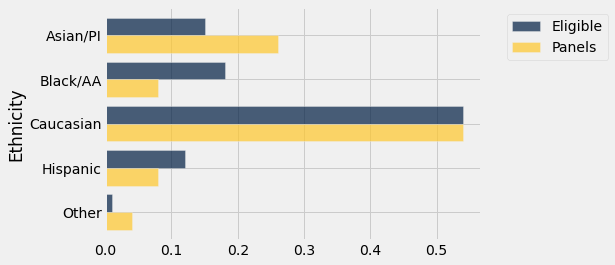

In [6]:
jury.barh('Ethnicity')

In [7]:
# Augment the table with a column of differences between proportions

jury_with_diffs = jury.with_column(
    'Difference', jury.column('Panels') - jury.column('Eligible')
)
jury_with_diffs

Ethnicity | Eligible | Panels | Difference
Asian/PI  | 0.15     | 0.26   | 0.11
Black/AA  | 0.18     | 0.08   | -0.1
Caucasian | 0.54     | 0.54   | 0
Hispanic  | 0.12     | 0.08   | -0.04
Other     | 0.01     | 0.04   | 0.03

In [8]:
jury_with_diffs = jury_with_diffs.with_column(
    'Absolute Difference', np.abs(jury_with_diffs.column('Difference'))
)

jury_with_diffs

Ethnicity | Eligible | Panels | Difference | Absolute Difference
Asian/PI  | 0.15     | 0.26   | 0.11       | 0.11
Black/AA  | 0.18     | 0.08   | -0.1       | 0.1
Caucasian | 0.54     | 0.54   | 0          | 0
Hispanic  | 0.12     | 0.08   | -0.04      | 0.04
Other     | 0.01     | 0.04   | 0.03       | 0.03

In [9]:
jury_with_diffs.column('Absolute Difference').sum() / 2

0.14

In [10]:
def total_variation_distance(distribution_1, distribution_2):
    return sum(np.abs(distribution_1 - distribution_2)) / 2

In [11]:
total_variation_distance(jury.column('Panels'), jury.column('Eligible'))

0.14

In [20]:
sample_distribution = sample_proportions(1453, eligible_population)
total_variation_distance(sample_distribution, eligible_population)

0.018265657260839632

In [13]:
# Simulate one simulated value of 
# the total variation distance between
# the distribution of a sample selected at random
# and the distribution of the eligible population

def one_simulated_tvd():
    sample_distribution = sample_proportions(1453, eligible_population)
    return total_variation_distance(sample_distribution, eligible_population)   

In [14]:
tvds = make_array()
repetitions = 5000
for i in np.arange(repetitions):
    tvds = np.append(tvds, one_simulated_tvd())

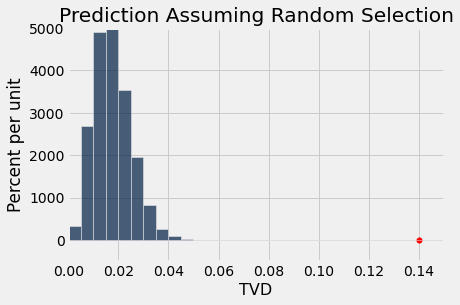

In [15]:
Table().with_column('TVD', tvds).hist(bins=np.arange(0, 0.2, 0.005))

# Plotting parameters; you can ignore this code
plots.title('Prediction Assuming Random Selection')
plots.xlim(0, 0.15)
plots.ylim(-5, 50)
plots.scatter(0.14, 0, color='red', s=30);